<a href="https://colab.research.google.com/github/khushidubeyokok/AI-ML/blob/main/01_Supervised_learning/03_Ridge_Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regular linear regression can overfit when you have many features or multicollinearity. Ridge and Lasso regression can help to overcome this.

## We are going to use Melbourne house Price Dataset where we'll predict House prices based on various features.

The Dataset Link is
https://www.kaggle.com/anthonypino/melbourne-housing-market

# Import libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
dataset=pd.read_csv('/content/Melbourne_housing_FULL.csv')

In [11]:
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [12]:
dataset.nunique()

,0
Suburb,351
Address,34009
Rooms,12
Type,3
Price,2871
Method,9
SellerG,388
Date,78
Distance,215
Postcode,211


In [13]:
dataset.shape ##there are 21 columns, we will reduce it and work with part of the dataset

(34857, 21)

# Preprocess data

In [14]:
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount',
               'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']
dataset = dataset[cols_to_use]

In [15]:
dataset.shape

(34857, 15)

In [16]:
dataset.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [20]:
dataset.isna().sum()

,0
Suburb,0
Rooms,0
Type,0
Method,0
SellerG,0
Regionname,3
Propertycount,3
Distance,1
CouncilArea,3
Bedroom2,8217


In [21]:
#some NA values can be filled with zeroes
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)

In [22]:
#while other NA values will be filled with mean
dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())

In [23]:
dataset.isna().sum()

,0
Suburb,0
Rooms,0
Type,0
Method,0
SellerG,0
Regionname,3
Propertycount,0
Distance,0
CouncilArea,3
Bedroom2,0


In [26]:
dataset.dropna(inplace=True) #since dataset is huge ~35k we can drop ~7k rows
dataset.isna().sum()

,0
Suburb,0
Rooms,0
Type,0
Method,0
SellerG,0
Regionname,0
Propertycount,0
Distance,0
CouncilArea,0
Bedroom2,0


In [27]:
dataset.shape

(27244, 15)

In [28]:
# one hot encode categorical variables
dataset = pd.get_dummies(dataset, drop_first=True)
dataset.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,False,...,False,False,False,False,False,False,False,False,True,False
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0000,1035000.0,False,...,False,False,False,False,False,False,False,False,True,False
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,False,...,False,False,False,False,False,False,False,False,True,False
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,False,...,False,False,False,False,False,False,False,False,True,False
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0000,1600000.0,False,...,False,False,False,False,False,False,False,False,True,False


In [30]:
dataset.shape

(27244, 745)

# Linear regression
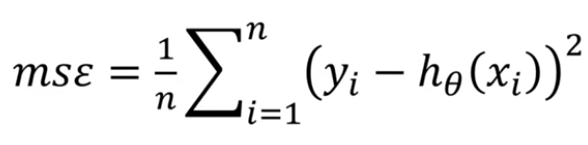

In [31]:
x = dataset.drop('Price', axis=1)
y = dataset['Price']

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [36]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [37]:
lr.fit(x_train,y_train)

LinearRegression()

In [42]:
lr.score(x_train,y_train)

0.6827792395792723

In [39]:
lr.score(x_test,y_test)

0.1385368316165222

Training score is high but test score is very low , this indicates overfitting

# Using Lasso (L1 Regularized) Regression Model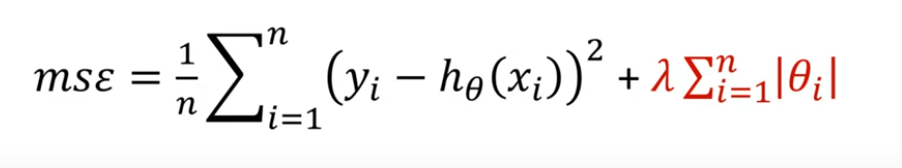

In [44]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.327e+15, tolerance: 7.963e+14
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=50, max_iter=100, tol=0.1)

In [45]:
lasso_reg.score(x_train,y_train)

0.6766985624766824

In [46]:
lasso_reg.score(x_test,y_test)

0.6636111369404489

# Using Ridge (L2 Regularized) Regression Model
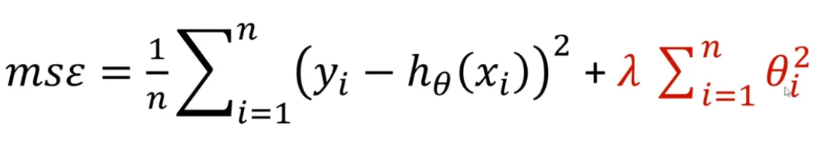

In [48]:
from sklearn.linear_model import Ridge
Ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
Ridge_reg.fit(x_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [49]:
Ridge_reg.score(x_train,y_train)

0.6622376739684328

In [50]:
Ridge_reg.score(x_test,y_test)

0.6670848945194958

It is evident that Lasso and Ridge ie L1 and L2 regularised models perfomed better than Linear regression model